# Задача Титаник

### Основная цель работы: нужно предсказать выживет ли пасажир

# Получение данных и импорт библеотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/titanictest/Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

## Визуализация распределения признаков

#### Зададим цветовую палитру

In [5]:
sns.set(style='whitegrid')
colors = ['#3A1078', '#3795BD', '#D7C0AE']

palette = {1: colors[0], 0: colors[1]}

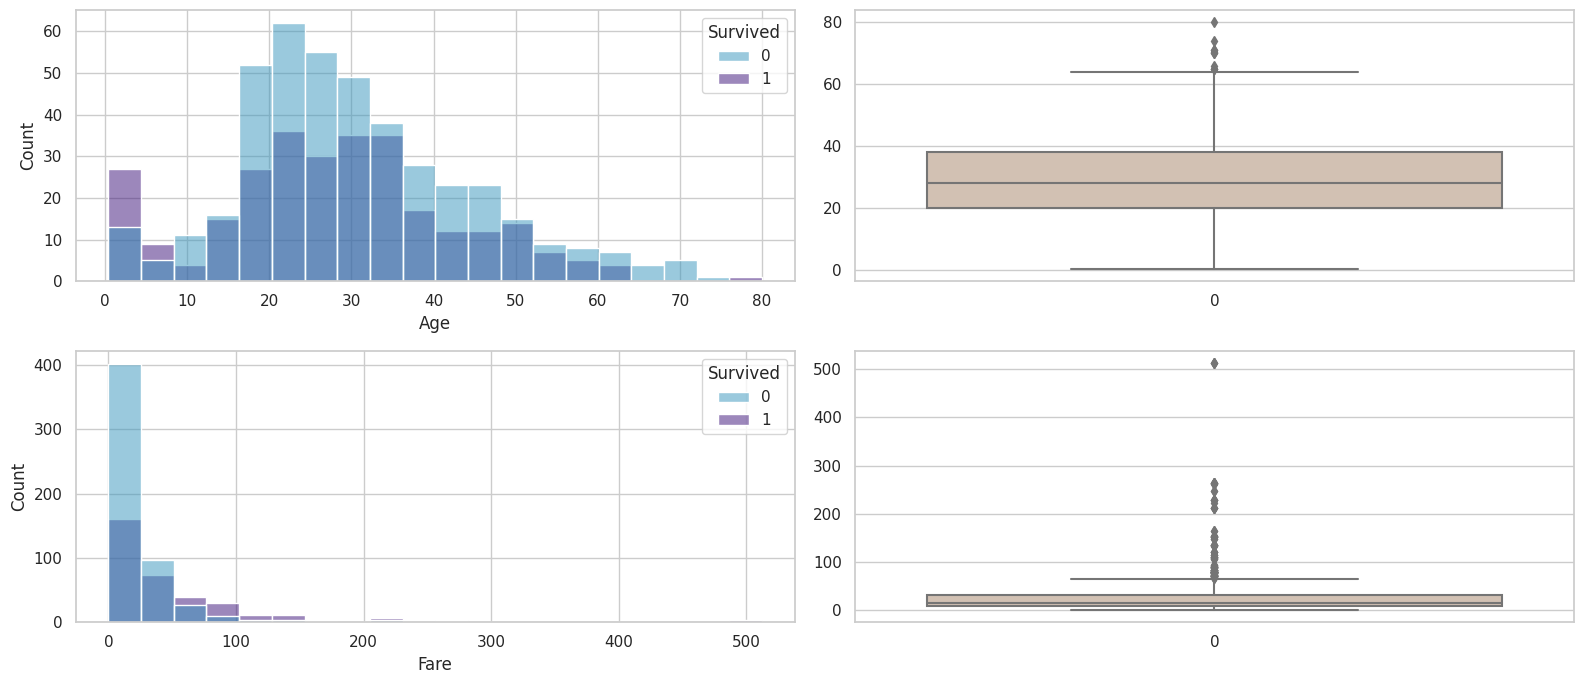

In [6]:
plt.figure(figsize=(16, 7))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=20, hue='Survived', palette=palette)

plt.subplot(2, 2, 2)
sns.boxplot(df['Age'], color=colors[2])

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Fare', bins=20, hue='Survived', palette=palette)

plt.subplot(2, 2, 4)
sns.boxplot(df['Fare'], color=colors[2])

plt.tight_layout()
plt.show()

### 1. Графики распределения возраста:
* **Гистограмма возраста** показывает, что молодые пассажиры состовляли большую часть выборки. Среди неих есть как выжившие, так и погибшие. Процент выживших больше среди детей и подростков, что может говорить о приоритете спасения детей.
* **Boxplot возраста** подтверждает, что меддианный возраст пассажиров находится между 20 и 40 годами. Также наблюдаются выборосы среди пассажиров возраст которых равен или больше 60 лет. Выжившие распределены преимущественно среди более молодых групп, в то время как пожилые пасажиры имеют меньше шанс на выживание.

### 1. Графики распределения стоимости билетов (Fare):
* **Гистограмма стоимости билета** показывает, что большинство пассажиров имели билеты с низкой стоимостью (ниже 100 едениц). Среди пассажиров с более высокими значениями (от 100 и выше) выживаемость выше, что может указывать на корреляцию между классом обслуживания и шансами на спасение.
* **Boxplot стоимости билета** показывает значительое количество выбросов среди высоких значений. Это говорит о том, что некоторые пассажиры купили очень дорогие билеты, что может быть связанно с более высоким классом обслуживания и, как следствие, с большей вероятностью на спасение

#### Заключение:
* Молодой возраст и высокая стоимость билета положительно коррелируют с выживаемостью. Вероятно дети и пассажиры в более высоком классе имели преимущество при спасении.
* Пожилые пассажиры и пассажиры с дешевыми билетами имели меньший шанс на выживание, что может указывать на социальные или экономические приоритеты при эвакуации.

#### Посмотрим в логарифмическом масштабе

<Axes: xlabel='Fare', ylabel='Count'>

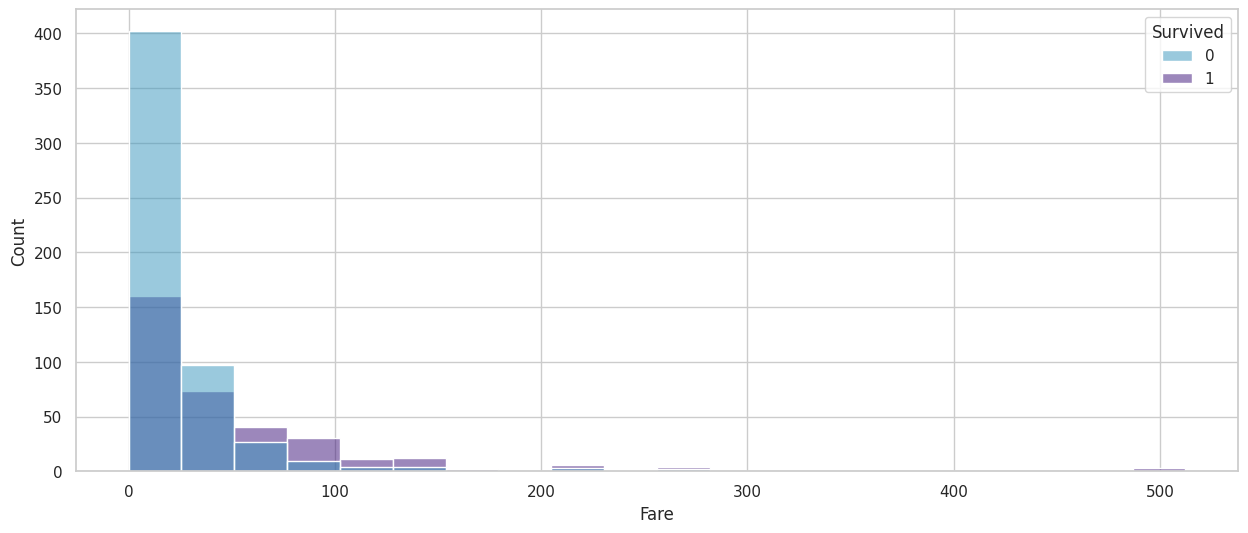

In [11]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Fare', bins=20, log_scale=True, hue='Survived', palette=palette,);
#sns.histplot(data=df, x='Fare', bins=20, hue='Survived', palette=palette)

#### Удалим все что меньше 2 и больше 100

In [12]:
question_fare = df[(df['Fare'] >= 100) | (df['Fare'] <= 2)]
df = df.drop(question_fare.index)
df = df.reset_index(drop=True)

#### Построим график распределения выживаемости по полу

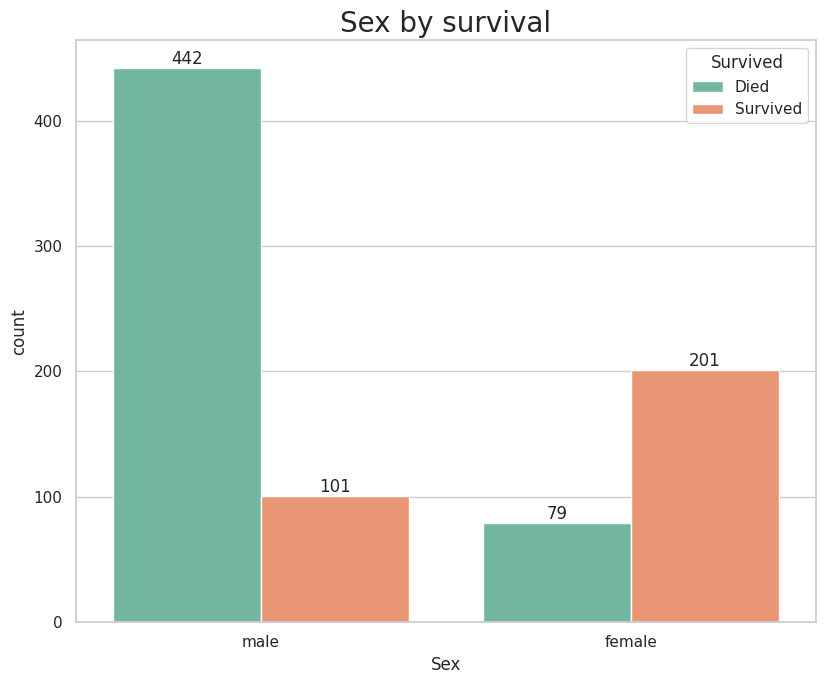

In [18]:
palette_1 = sns.color_palette('Set2')
plt.figure(figsize=(16, 7))

ax = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=df, palette=palette_1, ax=ax)
ax.bar_label(ax.containers[0])
if len(ax.containers[0]) > 1:
    ax.bar_label(ax.containers[1])

plt.legend(('Died', 'Survived'), title='Survived')
plt.title('Sex by survival', fontsize=20)

#ax = plt.subplot(1, 2, 2)
#sex_survived_counts = df.groupby(['Sex', 'Survived']).size().unstack()
#sex_survived_counts.plot(kind='pie', y=1, explode=[0.1, 0.1], autopct='%1,2f%%', shadow=True, ax=ax, colors=palette_1)
#ax.set_ylabel('')
#ax.set_title('Sex Distribution by Survival', fontsize=20)

plt.tight_layout()
plt.show()

#### **График распределения выживаемости по полу**
* Среди мужчин выживаемость значительно ниже: из 543 мужчин, выжило 101. Это указывает что мужчины имели меньше шансы на выживание. Думаю это связано с тем, что в приоритете спасения были дети и женщины.
* Среди женщин, напротив, выживаемость выше: из 280 женщин, выжило 201. То есть у женщин более высокая вероятность на спасение.

#### Заключение:
Из графика можно сделать выовд, что пол сильно влияет на выживание. Женщина выживали чаще мужчин, что говорит о том, что на спасение в приоритете были дети и женщины. Это показывает культуру и воспитание.

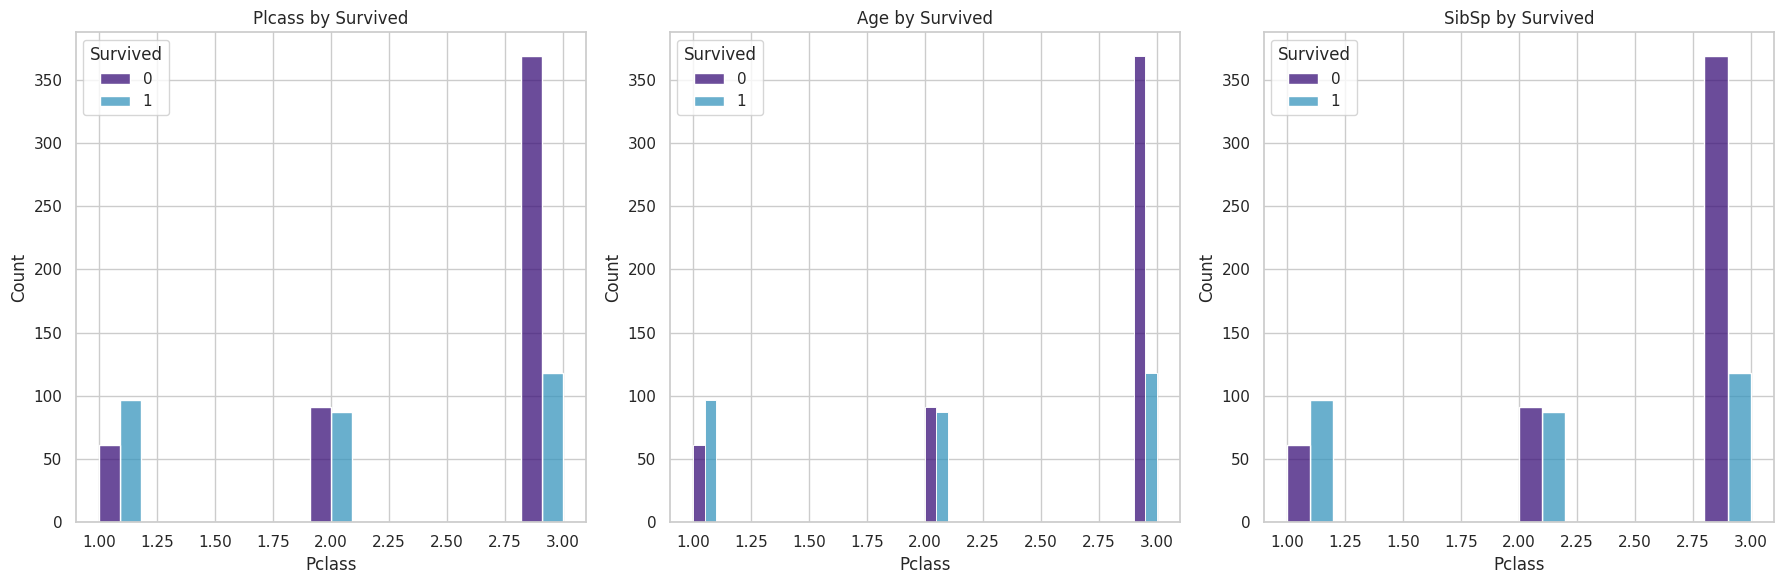

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.histplot(data=df, x='Pclass', hue='Survived', multiple='dodge', palette=colors[:2], ax=axes[0])
axes[0].set_title('Plcass by Survived')

sns.histplot(data=df, x='Pclass', hue='Survived', bins=20, multiple='dodge', palette=colors[:2], ax=axes[1])
axes[1].set_title('Age by Survived')

sns.histplot(data=df, x='Pclass', hue='Survived', bins=10, multiple='dodge', palette=colors[:2], ax=axes[2])
axes[2].set_title('SibSp by Survived')

plt.tight_layout()
plt.show()

#### График 1: Распределение выживаемости по классу
* Пассажиры первого класса имели наибольшие шансы на выживание: среди них больше выживших, чем погибших.
* Во втором классе шансы на выживаемость также довольно высокие, хотя разница между выживаемость первого класса и второго класса очень велика (около 210). Также разница между выжившими и погибшими не так сильно велика, как таже разника только в пером классе
* Пассажиры третьего класса имели наименьшие шансы на спасение. Большинство из них погибло и выживших среди них значительно меньше, чем в других классах. Это может быть связано с тем, что значимость социальных и экономических навыков пассажира играли большую роль в приоритете спасения и также в доступности спасательных ресурсов.

#### График 2: Распределение выживаемости по возрасту
* Молодые пассажиры (особенно дети и подрости) имели более высокие шансы на выживаине. Это может указывать на приоритет спасения детей.
* Среди взрослых пассажиров доля погибших увеличивается, особенно для возрастов от 20 до 40 лет, где погибших болеше, чем выживших.
* Пожилые пассажиры также имели невысокие шансы на выживание, что может свидетельстовать о трудностях при эвакуации для этой возрастной группы.

#### График 3: Распределение выживаемости по кол-ву родственников на борту
* Пассажиры, у которых не было братьев/сестер или супругов на борту (SibSp = 0), чаще погибали, хотя среди них также есть значительное число выживших.
* Пассажиры с 1 родственником (SibSp = 1) имели более высокие шансы на выживание. Это может быть связано с возможностью получать поддержку и помощь от сленов семьм во время эвакуации.
* С увеличением кол-во родствеников на борут (SibSp >= 2) шансы на выживаемость падают, а чилос погибших растет. Вероятно, большие семьи могли испытывать при эвакуации, особенно с маленькими детьми или пожилые членами семьи.

#### Заключение:
* Класс обслуживания и возраст сильно влияют на шансы выживаниея. Пассажиры первого и второго класса и дети имели более выкоие шансы на спасение.
* Пассажиры с 1 родственником имели более высокие шансы на выживание. Тогда как эвакуации.

### Матрица корреляции в виде тепловой карты

#### Нарисуем матрциу корреляции в виде тепловой карты, чтобы понять какие признаки, как коррелируеют между собой.

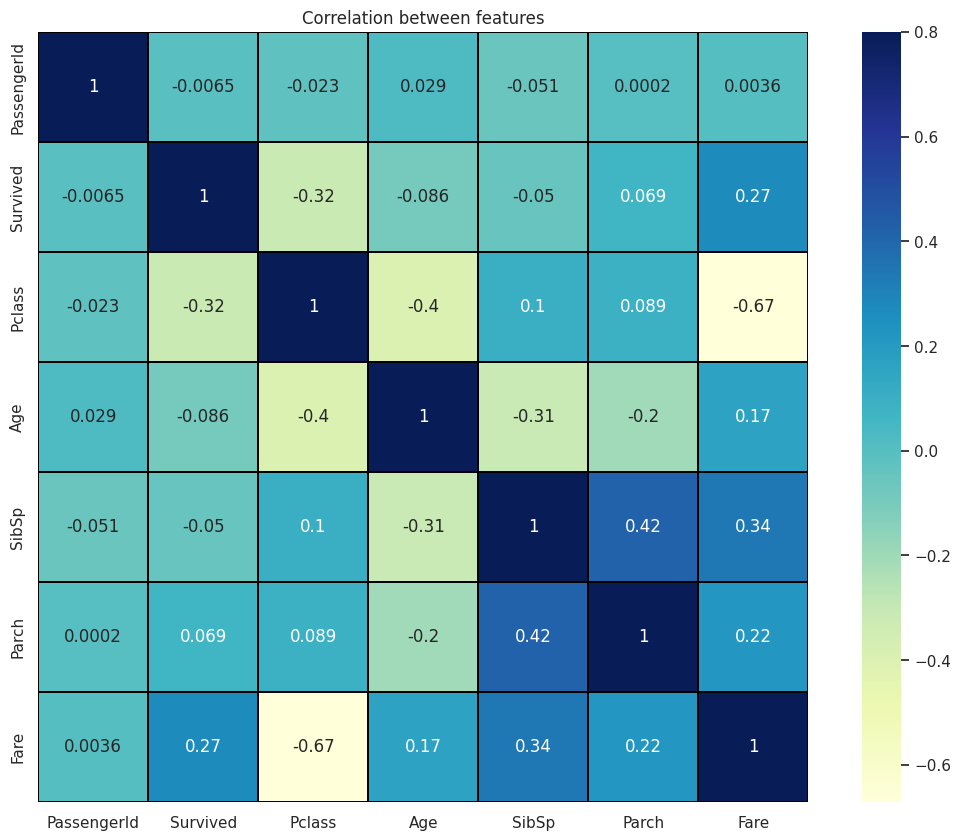

In [21]:
df_numeric = df.select_dtypes(exclude=['object', 'category'])
corr = df_numeric.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title('Correlation between features')
plt.show()

#### Основные наблюдения:
1. Класс обслуживания (Pclass) и выживаемость (Survived):
    * Существует отрицательная корреляция между классом обслуживания и выживаемостью. Это подтверждает, что пассажиры более высокого класса имели больше шансов на выживание по сравнению с пассажирами низкого класса.
2. Стоимость билета (Fare) и класс обслуживания (Pclass):
    * Корреляция между стоимостью билета и классом очень низкая. Это высокая отрицательная корреляция, указывающая на то, что билеты более высокого класса имели более высокую стоимость по сравнению с билетами третьего класса.
3. Возраст (Age) и класс обслуживания (Pclass):
    * Наблюдается средняя отрицательная корреляция между возрастом и классом. Это может указывать на то, что пассажиры более молодого возраста чаще находились в низком классе обслуживания
4. Стоимость билета (Fare) и выживаемость (Survived):
    * Существует положительная корреляция между стоимостью билета и шансами на выживание, что может означать, что пассажиры с более дорогими билетами имели более высокие шансы на спасение. Это согласуется с более высокой выживаемостью первого класса.
5. Количество родителей/детей на борту (Parch) и количество братьев

# Анализируем датасет

# Гипотезы

# Cоздание признаков

# Нормализация датасета

# Корреляция новых признаков с таргетом

# Обучение на простой модели

# Permutation Importance

# Построение модели

# Работа с моделью

# Кросс-валидация

# Сохранение и загрузка модели

# Заключение и выводы

In [ ]:
df = pd.read_csv('/kaggle/input/titanictest/Titanic.csv')

In [ ]:
df

Значение колонок:
1. **PassengerId** - уникальный идентификатор пассажира
2. **Survived** - целевой признак (0 - не выжил 1 - выжил)
3. **Pclass** - класс билета (1, 2 или 3)
4. **Name** - имя и титул пассажира
5. **Sex** - пол пассажира (male или female)
6. **Age** - возсраст пассажира
7. **SibSp** - количество родственников и жены/мужы на борту
8. **Parch** - количество родителей и детей на борту
9. **Ticket** - номер билета
10. **Fare** - стоимость билета
11. **Cabin** - номерю каюты (если доступна)
12. **Embarked** - порт отправления (C, Q, S)

Выдвинутые гипотезы:
* выживание зависит от номера каюты
* выживание зависит от класса билета
* выживание зависит от возсраста
* выживание зависит от пола
* выживание зависит от id
* выживание зависит от SibSp
* выживание зависит от Parch

In [ ]:
df['Survived'].value_counts()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

Минимальные критерии для запуска модели машинного обучения
1) отсутствие пропусков
2) убрать не числовые типы

In [ ]:
df.info()

In [ ]:
кодируем данные 
колонки у которых тип данных object

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
categorical_cols

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df

Видим что все колонны стали числами

In [ ]:
df.info()

теперь уберем пропуски в данных

In [ ]:
df.isnull().sum()

У нас пропуски только в колонке возраст
Заполним в ней нули медианным значением по этой же колонке

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df.isnull().sum()

Сначала надо закодировать все в числа, затем заполнять пропуски

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X

In [ ]:
df['Survived'].value_counts()

Создаем модель

* изменил test_size на 0.1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the merual network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

In [ ]:
df.info()

график

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()